# Data Modeling
Zuerst vorbereitete Daten einlesen

In [2]:
import pandas as pd;

cleaned_data = pd.read_csv('cleaned_data.csv')

C:\Users\I586521\AppData\Local\Temp\ipykernel_26768\2383269318.py:3: DtypeWarning: Columns (9,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('cleaned_data.csv')


### Robert 
--Predict the category of crime that occurred given a certain time and location

In [ ]:
# weitere Spalte im DataFrame erstellen. Binäre Variablen, ob Wochenende, oder nicht. 

# Neue Spalte "Wochenende" erstellen und initial mit 0 initialisieren
cleaned_data['Wochenende'] = 0

# Überprüfen, ob das Datum ein Wochenende ist und in "Wochenende"-Spalte 1 setzen
cleaned_data.loc[cleaned_data['DATE.OCC_weekday'] >= 5, 'Wochenende'] = 1

# Ausgabe des aktualisierten DataFrames
#print(csv_data)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
#zählen wie viele Verschiedne Werte LOCATION hat
num_rows_with_location = cleaned_data['LOCATION'].count()
print("Anzahl der Zeilen mit Werten in der Spalte 'LOCATION':", num_rows_with_location)
num_unique_locations = cleaned_data['LOCATION'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'LOCATION':", num_unique_locations)

num_unique_locations = cleaned_data['AREA'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'AREA':", num_unique_locations)

num_unique_locations = cleaned_data['AREA.NAME'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'AREA.NAME':", num_unique_locations)

num_unique_locations = cleaned_data['RD'].nunique()
print("Anzahl der verschiedenen Werte in der Spalte 'RD':", num_unique_locations)

Anzahl der Zeilen mit Werten in der Spalte 'LOCATION': 1136589
Anzahl der verschiedenen Werte in der Spalte 'LOCATION': 154423
Anzahl der verschiedenen Werte in der Spalte 'AREA': 21
Anzahl der verschiedenen Werte in der Spalte 'AREA.NAME': 21
Anzahl der verschiedenen Werte in der Spalte 'RD': 1303


In [ ]:
# Spalte LOCATION wird zu mehrere 0,1 Variablen um diese im Suchbaum abzubilden 

# One-Hot Encoding für das String-Feature "LOCATION"
encoded_data = pd.get_dummies(cleaned_data, columns=['AREA.NAME','RD'])

# Anzeigen des transformierten DataFrames
print(encoded_data.head())



# Aufteilung in Features und Zielvariable
#X = encoded_data.drop('TARGET', axis=1)
#y = encoded_data['TARGET']


   Date.Rptd      DR.NO   DATE.OCC  TIME.OCC  AREA  Crm.Cd  \
0 2013-03-20  132007717 2013-03-20  20:15:00    20     997   
1 2013-03-10  130608787 2013-03-10  04:45:00     6     997   
2 2013-12-18  131820260 2013-12-18  07:45:00    18     997   
3 2013-10-18  131817514 2013-10-18  17:30:00    18     997   
4 2013-05-26  130510483 2013-05-25  20:00:00     5     440   

                         CrmCd.Desc Status Status.Desc             LOCATION  \
0                      TRAFFIC DR #    UNK     Unknown               OXFORD   
1                      TRAFFIC DR #    UNK     Unknown              ODIN ST   
2                      TRAFFIC DR #    UNK     Unknown             105TH ST   
3                      TRAFFIC DR #    UNK     Unknown             101ST ST   
4  THEFT PLAIN - PETTY (UNDER $400)    UNK     Unknown  1300 W SEPULVEDA BL   

   ... RD_2173  RD_2175  RD_2177  RD_2183  RD_2185  RD_2187 RD_2189  RD_2196  \
0  ...   False    False    False    False    False    False   False    F

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD', 'Wochenende']
target = 'CRIME_VIOLENT'


# Schritt 2.1: LabelEncoder auf den gesamten Datensatz anwenden
#label_encoder = LabelEncoder()
#csv_data[features] = csv_data[features].apply(label_encoder.fit_transform)

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

##Encoding
#label_encoder = LabelEncoder()
#X_train['RD'] = label_encoder.fit_transform(X_train['RD'])
#X_test['RD'] = label_encoder.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.7323749109177452


In [ ]:
predict_data = cleaned_data.copy()
# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD', 'Wochenende', 'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 2.1: LabelEncoder auf den gesamten Datensatz anwenden
#label_encoder = LabelEncoder()
#csv_data[features] = csv_data[features].apply(label_encoder.fit_transform)

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

##Encoding
#label_encoder = LabelEncoder()
#X_train['RD'] = label_encoder.fit_transform(X_train['RD'])
#X_test['RD'] = label_encoder.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.43426836090465915


<Axes: title={'center': 'Amount of crimes committed per year and area in Los Angeles'}, xlabel='AREA.NAME'>

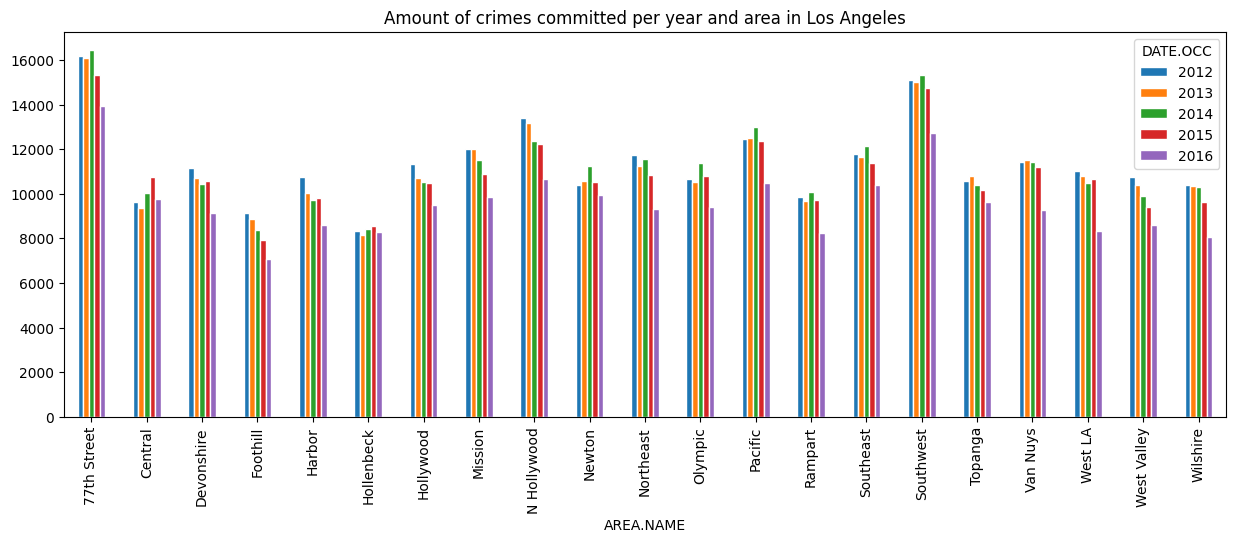

In [ ]:
import datetime

# Create dataset with year instead of date
data_with_year = data_sorted_by_date_occ.copy()
data_with_year['DATE.OCC'] = data_with_year['DATE.OCC'].dt.year

only_date_and_area = data_with_year[['AREA.NAME','DATE.OCC','DR.NO']]
only_date_and_area.groupby(['AREA.NAME','DATE.OCC'])['DR.NO'].count().unstack('DATE.OCC').plot(kind='bar', title='Amount of crimes committed per year and area in Los Angeles', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))

In [ ]:
from sklearn import tree
import pandas as pd
import graphviz 
import pydotplus

# Eventuell musst du cl_fit durch den Namen des Objektes ersetzen, welches du in Aufgabe 6 erstellt hast.
class_names = [str(c) for c in model.classes_] 
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features, class_names= class_names , filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# Ab hier ergänzen, sodass 'graph' einmal als PNG-Bild und einmal als PDF gesichert wird

graph.write_png("decTree.png")
graph.write_pdf("decTree.pdf")

InvocationException: GraphViz's executables not found

In [ ]:
print(class_names)

['110', '113', '121', '122', '210', '220', '230', '231', '235', '236', '237', '250', '251', '310', '320', '330', '331', '341', '343', '345', '347', '349', '350', '351', '352', '353', '354', '410', '420', '421', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '450', '451', '452', '470', '471', '473', '474', '475', '480', '485', '487', '510', '520', '622', '623', '624', '625', '626', '627', '647', '648', '649', '651', '652', '653', '654', '660', '661', '662', '664', '666', '668', '670', '740', '745', '753', '755', '756', '760', '761', '762', '763', '805', '806', '810', '812', '813', '814', '815', '820', '821', '822', '830', '840', '845', '850', '860', '865', '870', '880', '882', '884', '886', '888', '890', '900', '901', '902', '903', '910', '920', '921', '922', '924', '928', '930', '931', '932', '933', '940', '942', '943', '944', '946', '948', '949', '950', '951', '952', '954', '956', '997']
